### Triphone-level phonetic analysis

In [1]:
import os
import re
import json
import librosa
import numpy as np
import pandas as pd
from collections import Counter, defaultdict

np.random.seed(42)

Normal speech: 

In [ ]:
DATA_PATH="CorpusOfDeafSpeech"
group_directory = "Normal Hearing"
group = "NH"
directory = os.path.join(DATA_PATH,group_directory)

## dictionary to collect triphones with middle phone timing
NH_triphone_dict = defaultdict(list)

for subject_id in range(1,11):  # from NH01 to NH10
    if subject_id != 10:
        subject_mfa_dir = f"NH0{subject_id}_aligned"
    else:
        subject_mfa_dir = f"NH{subject_id}_aligned"
    for root, dirs, files in os.walk(os.path.join(directory,subject_mfa_dir)):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                audio_filename = re.sub('.csv','.wav',file)

                ## load alignment dataframe
                df = pd.read_csv(file_path)
                df = df.fillna(" ")
                ## extract phones
                df = df.loc[df['type'] == 'p'] 

                phones = df['label'].tolist()
                starts = df['start'].tolist()
                ends = df['end'].tolist()

                ## collect all triphones and their middle phone times
                for i in range(len(phones) - 2):
                    triphone = (phones[i], phones[i+1], phones[i+2])
                    mid_start = starts[i+1]
                    mid_end = ends[i+1]
                    NH_triphone_dict[triphone].append([audio_filename, mid_start, mid_end])
                    
## test one triphone
arr = np.array(NH_triphone_dict[('AH0', 'N', 'D')], dtype=object)
print(arr)
print(type(arr[0][1]))

[['NH1DC2DR2.wav' 20.49 20.52]
 ['NH1DC2DR2.wav' 32.53 32.56]
 ['NH1DC2DR2.wav' 42.62 42.65]
 ...
 ['NH10C9DR2.wav' 213.16 213.19]
 ['NH10C9DR2.wav' 233.16 233.19]
 ['NH10C9DR2.wav' 239.04 239.07]]
<class 'float'>


Save to JSON file:

In [ ]:
json_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f'{group}_triphones.json')
kv_pairs = [{'triphone': k, 'samples': v} for k, v in NH_triphone_dict.items()]
with open(json_path, 'w') as f:
    json.dump(kv_pairs, f, indent=4)

Count and sort:

In [ ]:
## build a DataFrame with counts and timing info
rows = []
for triphone, times_list in NH_triphone_dict.items():
    rows.append({
        'triphone': triphone,
        'count': len(times_list)
    })

result_df = pd.DataFrame(rows)

## sort descending
result_df = result_df.sort_values(['count'], ascending=[False]).reset_index(drop=True)
result_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f"{group}_triphones.csv")
result_df.to_csv(result_path)
print(result_df)


             triphone  count
0         (AH0, N, D)   2667
1        (HH, AA1, L)   2354
2         (W, AH0, Z)   2080
3         (AE1, N, D)   1982
4         (S, EH1, D)   1908
...               ...    ...
13950       ( , L, G)      1
13951  (AW1, DH, AH1)      1
13952   (UH2, D, AE1)      1
13953     ( , ER0, D)      1
13954   (IH1, AA1, T)      1

[13955 rows x 2 columns]


Deaf speech: 

In [ ]:
group_directory = "Deaf"
group = "HI"
directory = os.path.join(DATA_PATH,group_directory)

## dictionary to collect triphones with middle phone timing
HI_triphone_dict = defaultdict(list)

for subject_id in range(1,32):  # from S01 to S31
    subject_mfa_dir = f"S{subject_id}_aligned"
    for root, dirs, files in os.walk(os.path.join(directory,subject_mfa_dir)):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                audio_filename = re.sub('.csv','.wav',file)

                ## load alignment dataframe
                df = pd.read_csv(file_path)
                df = df.fillna(" ")
                ## extract phones
                df = df.loc[df['type'] == 'p'] 

                phones = df['label'].tolist()
                starts = df['start'].tolist()
                ends = df['end'].tolist()

                ## collect all triphones and their middle phone times
                for i in range(len(phones) - 2):
                    triphone = (phones[i], phones[i+1], phones[i+2])
                    mid_start = starts[i+1]
                    mid_end = ends[i+1]
                    HI_triphone_dict[triphone].append([audio_filename, mid_start, mid_end])

## test one triphone
arr = np.array(HI_triphone_dict[('AH0', 'N', 'D')], dtype=object)
print(arr)
print(type(arr[0][1]))

[['S1DC1DR2.wav' 40.46 40.49]
 ['S1DC2DR2.wav' 26.6 26.67]
 ['S1DC2DR2.wav' 27.74 27.78]
 ...
 ['S31C9DR2.wav' 125.37 125.46]
 ['S31C9DR2.wav' 138.04 138.07]
 ['S31C9DR2.wav' 304.58 304.63]]
<class 'float'>


Save to JSON file: 

In [ ]:
json_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f'{group}_triphones.json')
kv_pairs = [{'triphone': k, 'samples': v} for k, v in HI_triphone_dict.items()]
with open(json_path, 'w') as f:
    json.dump(kv_pairs, f, indent=4)

Count and sort: 

In [ ]:
## build a DataFrame with counts and timing info
rows = []
for triphone, times_list in HI_triphone_dict.items():
    rows.append({
        'triphone': triphone,
        'count': len(times_list)
    })

result_df = pd.DataFrame(rows)

## sort descending
result_df = result_df.sort_values(['count'], ascending=[False]).reset_index(drop=True)
result_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f"{group}_triphones.csv")
result_df.to_csv(result_path)
print(result_df)

              triphone  count
0         (DH, AH0,  )  13420
1         ( , DH, AH0)  10521
2          (AE1, N, D)   7004
3          ( , AE1, N)   6082
4            (N, D,  )   5948
...                ...    ...
17232    (V, spn, AE1)      1
17233     (Y, EH1, DH)      1
17234  (IY0, AE1, AH0)      1
17235      (Z, S, ER0)      1
17236   (IH1, DH, OW1)      1

[17237 rows x 2 columns]


By intelligibility: 

In [ ]:
group_directory = "Deaf"
group = "HI"
directory = os.path.join(DATA_PATH,group_directory)
intelligibility = "high"
HI_intell_high = [1,4,5,8,9,10]
HI_intell_med = [6,7,12,15,23,25,26,27,29,30,31]
HI_intell_low = [2,3,13,14,16,17,18,19,20,21,22,24,28]

## dictionary to collect triphones with middle phone timing
HI_triphone_dict_high = defaultdict(list)

for subject_id in HI_intell_high:
    subject_mfa_dir = f"S{subject_id}_aligned"
    for root, dirs, files in os.walk(os.path.join(directory,subject_mfa_dir)):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                filename = re.sub('.csv','.wav',file)

                ## load alignment dataframe
                df = pd.read_csv(file_path)
                df = df.fillna(" ")
                ## extract phones
                df = df.loc[df['type'] == 'p'] 

                phones = df['label'].tolist()
                starts = df['start'].tolist()
                ends = df['end'].tolist()

                ## collect all triphones and their middle phone times
                for i in range(len(phones) - 2):
                    triphone = (phones[i], phones[i+1], phones[i+2])
                    mid_start = starts[i+1]
                    mid_end = ends[i+1]
                    HI_triphone_dict_high[triphone].append([filename, mid_start, mid_end])

In [ ]:
json_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f'{group}_{intelligibility}_triphones.json')
kv_pairs = [{'triphone': k, 'samples': v} for k, v in HI_triphone_dict_high.items()]
with open(json_path, 'w') as f:
    json.dump(kv_pairs, f, indent=4)

In [ ]:
## Build a DataFrame with counts and timing info
rows = []
for triphone, times_list in HI_triphone_dict_high.items():
    rows.append({
        'triphone': triphone,
        'count': len(times_list)
    })

result_df = pd.DataFrame(rows)

## Sort descending
result_df = result_df.sort_values(['count'], ascending=[False]).reset_index(drop=True)
result_path = os.path.join(DATA_PATH, "data_info", "triphone_analysis", f"{group}_{intelligibility}_triphones.csv")
result_df.to_csv(result_path)
print(result_df)

            triphone  count
0       (DH, AH0,  )   8735
1       ( , DH, AH0)   6598
2          (N, D,  )   3499
3        (AE1, N, D)   2669
4       (IH0, NG,  )   2534
...              ...    ...
16083  (G, EH1, AO1)      1
16084   (OW1, M, SH)      1
16085  (AH1, EY1, R)      1
16086    (IH0,  , R)      1
16087  (EH2, R, IH0)      1

[16088 rows x 2 columns]


Helper function to extract MFCCs: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_mfcc_frame_mean(audio_path, start, end, 
                    frame_duration=20,    # (in milliseconds)
                    frame_stride=10,      # (in milliseconds)
                    n_mfcc=13,
                    n_mels=40,
                    n_fft=256,  # 512
                    hop_length=32, # 64
                    fmin = 0,
                    fmax = None,
                    deltas=False):
    """
    Load audio from path, split into (possibly overlapping) frames, calculate MFCC for each frame.

    Output shape: (n_frames, n_mfcc, t)
    """
    ## load audio
    y, sr = librosa.load(audio_path)
    
    ## split into overlapping frames
    frame_len = int(sr*frame_duration*0.001)
    step_len = int(sr*frame_stride*0.001)
    frames = np.lib.stride_tricks.sliding_window_view(y, frame_len)[::step_len]

    ## get the frames included in [start,end]  (in seconds)
    start_n = int(sr*start)
    end_n = int(sr*end)
    frame_start_indices = np.arange(0, len(y) - frame_len + 1, step_len)
    frame_ranges = [(start_idx, start_idx + frame_len) for start_idx in frame_start_indices]
    selected_frame_indices = [
        i for i, (start_idx, end_idx) in enumerate(frame_ranges)
        if (end_idx <= end_n and start_idx >= start_n)  # overlap condition
    ]
    selected_frames = frames[selected_frame_indices]    ## shape: (n_frames, frame_len)
    
    if selected_frames is None or len(selected_frames) == 0:
        # raise ValueError("Input audio signal is empty.")
        return np.empty((0, n_mfcc))
    
    ## L2-normalize each frame to unit energy
    norm_frames = np.array([frame / (np.linalg.norm(frame) + 1e-6) for frame in selected_frames])

    ## get mfcc
    mfcc = librosa.feature.mfcc(y=norm_frames, sr=sr, n_fft=n_fft,
                                n_mfcc=n_mfcc, n_mels=n_mels,
                                hop_length=hop_length,
                                fmin=fmin, fmax=fmax, htk=False)
    ## visualisation
    # fig, ax = plt.subplots()
    # img = librosa.display.specshow(mfcc[0], x_axis='time')
    # fig.colorbar(img)
    # print(np.shape(mfcc))

    mfcc_frame_mean = np.mean(mfcc, axis=-1)
    return mfcc_frame_mean


## test one sample
audio_path = "CorpusOfDeafSpeech/Normal Hearing/NH01/Davy Crockett/NH1DC2DR2.wav"
start, end = (20.49, 20.52)
mfcc_frame_mean = get_mfcc_frame_mean(audio_path, start, end)
print(np.shape(mfcc_frame_mean))

(1, 13)


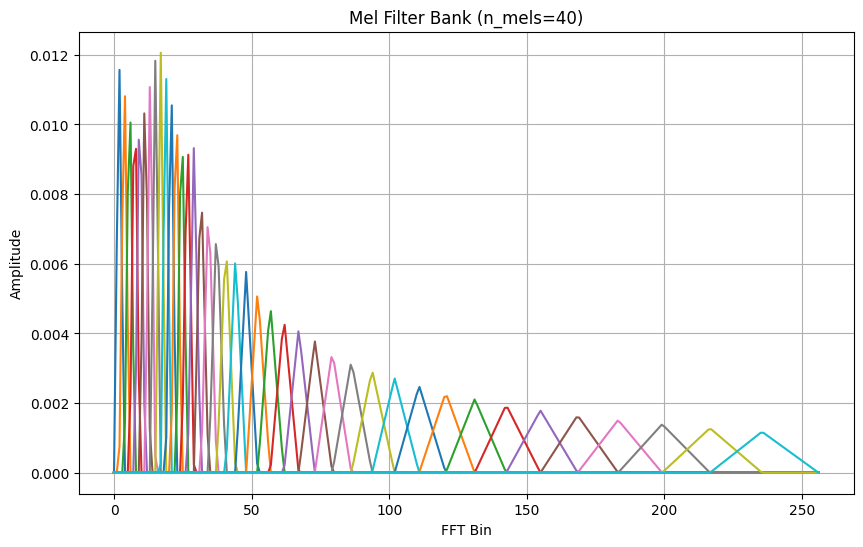

In [ ]:
sr = 22050   # sampling rate
n_fft = 512
n_mels = 40  # number of Mel filters
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

%matplotlib inline
# plot the Mel filter bank
plt.figure(figsize=(10, 6))
for i in range(len(mel_filter_bank)):
    plt.plot(mel_filter_bank[i], label=f'Mel {i+1}' if n_mels <= 10 else "")
plt.title(f'Mel Filter Bank (n_mels={n_mels})')
plt.xlabel('FFT Bin')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Compute stats for a particular triphone:

In [ ]:
def get_triphone_stats_frames(triphone, 
                       triphone_dict,
                       group, 
                       cutoff_duration = 1,
                       num_samples = 100,    # TODO
                       n_mfcc=13
                       ):
    if group == "NH":
        group_directory = "Normal Hearing"
    elif group == "HI":
        group_directory = "Deaf"
    else: 
        raise Exception("Invalid group, must be either \"HI\" (deaf) or \"NH\" (normal hearing)")
    
    ## get all samples of a particular triphone
    samples = np.asarray(triphone_dict[triphone], dtype=object)

    ## eliminate samples with unreasonable durations
    indices = np.where((samples[:,2]-samples[:,1])<cutoff_duration)[0]
    samples = samples[indices]

    ## take n random samples
    selected_samples = samples[np.random.choice(len(samples), size=num_samples, replace=False)]
    
    metadata_path = os.path.join(DATA_PATH,"data_info",f"{group}_metadata.csv")
    metadata_df = pd.read_csv(metadata_path)

    ## calculate mfcc stats
    mfcc_frame_mean_collection = np.empty((0, n_mfcc))  # empty array with matching number of columns

    for filename, start, end in selected_samples:
        ## find the sample
        sample = metadata_df[metadata_df["filename"]==filename]
        subject_id = sample["subject_id"].iloc[0]
        passage_id = sample["passage_id"].iloc[0]
        if passage_id.startswith("DC"):
            passage_folder = "Davy Crockett"
        elif passage_id.startswith("C") and passage_id[1:].isdigit():
            passage_folder = "Short Story"
        else:
            passage_folder = "Passages"
        if (group == "NH") and (not subject_id.endswith("0")):    # special processing for NH
            subject_id = subject_id[:-1] + "0" + subject_id[-1]
        audio_path = os.path.join(DATA_PATH, group_directory, subject_id, passage_folder, filename)

        ## get MFCCs (averaged across time in each frame)
        mfcc_frame_mean = get_mfcc_frame_mean(audio_path, start, end, n_mfcc=n_mfcc)
        mfcc_frame_mean_collection = np.vstack((mfcc_frame_mean_collection, mfcc_frame_mean))

    ## calculate cross-sample mfcc mean & std
    mfcc_frame_mean_collection = np.asarray(mfcc_frame_mean_collection)

    mfcc_sample_mean = np.mean(mfcc_frame_mean_collection, axis=0)
    mfcc_sample_var = np.std(mfcc_frame_mean_collection, axis=0)

    return mfcc_frame_mean_collection, mfcc_sample_mean, mfcc_sample_var


triphone = (' ', 'HH', 'IY1') # ('M', 'AY1', 'K') # ('S', 'EH1', 'D') # (' ', 'AE1', 'N') # ('HH', 'AA1', 'L') # ('AH0', 'N', 'D')
NH_stats, NH_mean, NH_var = get_triphone_stats_frames(triphone=triphone, triphone_dict=NH_triphone_dict, group="NH")
HI_stats, HI_mean, HI_var = get_triphone_stats_frames(triphone=triphone, triphone_dict=HI_triphone_dict, group="HI")

In [27]:
## store arrays locally
triphone = tuple("sil" if x == " " else x for x in triphone)
triphone_name = '_'.join(triphone)+'_frame'
save_path = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
np.savez(save_path, NH_stats=NH_stats, NH_mean=NH_mean, NH_var=NH_var)

In [ ]:
## load arrays back
triphone = (' ', 'AE1', 'N')  # (' ', 'HH', 'IY1'), ('M', 'AY1', 'K'), ('S', 'EH1', 'D') # ('AH0', 'N', 'D') # ('HH', 'AA1', 'L')
triphone = tuple("sil" if x == " " else x for x in triphone)
triphone_name = '_'.join(triphone)+'_frame'
save_path = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
triphone_stats = np.load(save_path)

In [ ]:
triphone = tuple("sil" if x == " " else x for x in triphone)
img_name = '_'.join(triphone)+'_frame'
print(img_name)
os.makedirs(os.path.join("img","triphone_analysis",img_name))

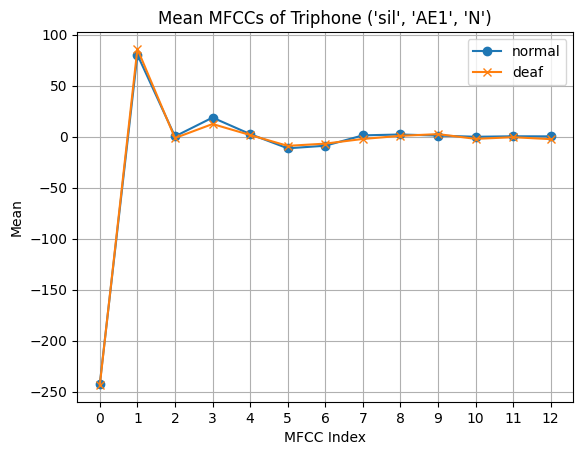

In [ ]:
plt.figure()
plt.plot(range(0,13), triphone_stats['NH_mean'], marker='o', label="normal")
plt.plot(range(0,13), triphone_stats['HI_mean'], marker='x',label="deaf")
plt.xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
plt.legend()
plt.xlabel("MFCC Index")
plt.ylabel("Mean")
plt.grid(True)
plt.title(f"Mean MFCCs of Triphone {triphone}")
# plt.savefig(os.path.join("img","triphone_analysis",triphone_name,"norm_mean_all.png"))
plt.show()

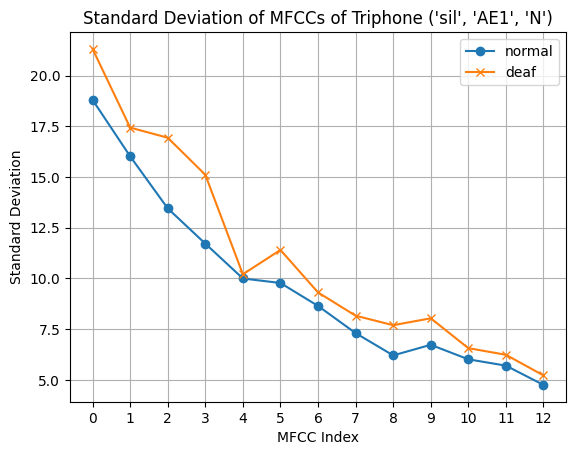

In [ ]:
plt.figure()
plt.plot(range(0,13), triphone_stats['NH_std'], marker='o', label="normal")
plt.plot(range(0,13), triphone_stats['HI_std'], marker='x', label="deaf")
plt.xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
plt.legend()
plt.xlabel("MFCC Index")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.title(f"Standard Deviation of MFCCs of Triphone {triphone}")
# plt.savefig(os.path.join("img","triphone_analysis",triphone_name,"norm_std_all.png"))
plt.show()

For different intelligibilities:

Text(0.5, 1.0, "Standard Deviation for Triphone ('sil', 'AE1', 'N')")

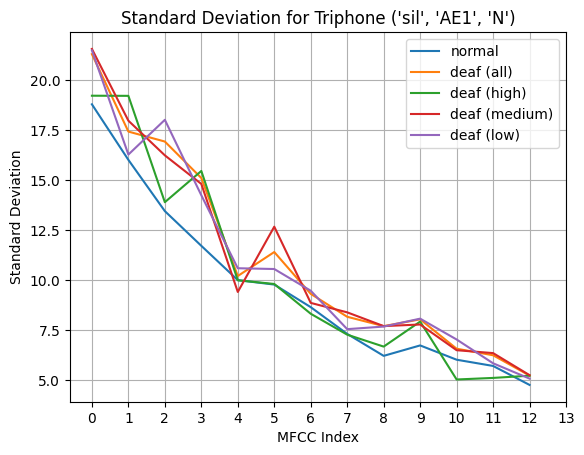

In [ ]:
## load arrays back
triphone = (' ', 'AE1', 'N') # ('S', 'EH1', 'D') # ('AH0', 'N', 'D') # ('HH', 'AA1', 'L')
triphone = tuple("sil" if x == " " else x for x in triphone)
triphone_name = '_'.join(triphone)+'_frame'
save_path_1 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
triphone_stats_1 = np.load(save_path_1)
save_path_2 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}_intelli.npz')
triphone_stats_2 = np.load(save_path_2)
styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
markers = ['o', 's', '^', 'd', '*']

plt.figure()
plt.plot(range(0,13), triphone_stats_1['NH_std'], label="normal")
plt.plot(range(0,13), triphone_stats_1['HI_std'], label="deaf (all)")
plt.plot(range(0,13), triphone_stats_2['HI_std_h'], label="deaf (high)")
plt.plot(range(0,13), triphone_stats_2['HI_std_m'], label="deaf (medium)")
plt.plot(range(0,13), triphone_stats_2['HI_std_l'], label="deaf (low)")
plt.xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
plt.legend()
plt.xlabel("MFCC Index")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.title(f"Standard Deviation for Triphone {triphone}")

Plot all in one:

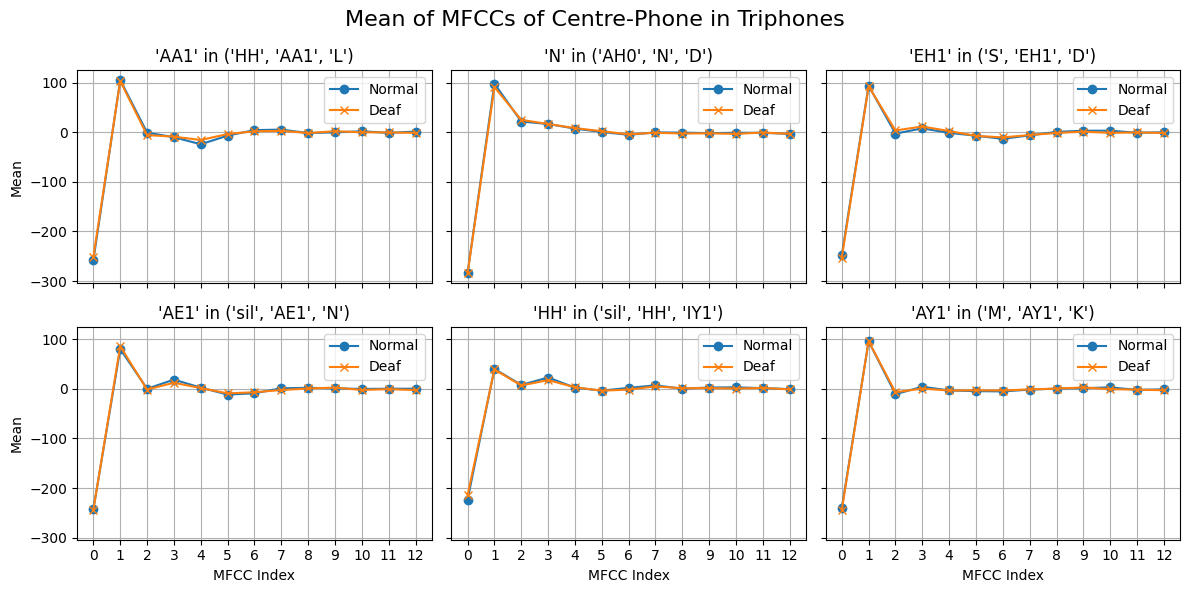

In [ ]:
triphone_list = [('HH', 'AA1', 'L'), ('AH0', 'N', 'D'), ('S', 'EH1', 'D'), (' ', 'AE1', 'N'), (' ', 'HH', 'IY1'), ('M', 'AY1', 'K')]

# create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot in each subplot and give each a subtitle
for i, ax in enumerate(axes):
    triphone = triphone_list[i]
    triphone = tuple("sil" if x == " " else x for x in triphone)
    triphone_name = '_'.join(triphone)+'_frame'
    save_path = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
    triphone_stats = np.load(save_path)

    ax.plot(range(0,13), triphone_stats['NH_mean'], marker='o', label="Normal")
    ax.plot(range(0,13), triphone_stats['HI_mean'], marker='x',label="Deaf")
    ax.set_xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
    ax.legend()
    ax.set(xlabel='MFCC Index', ylabel='Mean')
    
    # subtitle for each subplot
    ax.set_title(f"\'{triphone[1]}\' in {triphone}")
    ax.grid(True)

for ax in axes:
    ax.label_outer()
fig.suptitle("Mean of MFCCs of Centre-Phone in Triphones",fontsize=16)

# adjust layout to prevent overlap
plt.tight_layout()

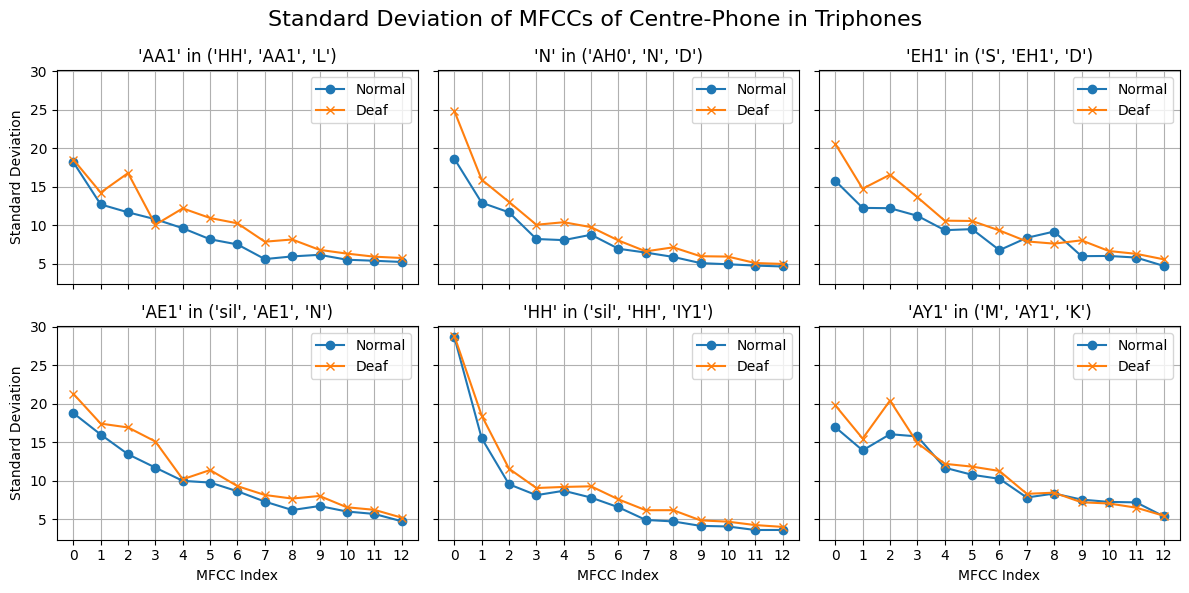

In [ ]:
triphone_list = [('HH', 'AA1', 'L'), ('AH0', 'N', 'D'), ('S', 'EH1', 'D'), (' ', 'AE1', 'N'), (' ', 'HH', 'IY1'), ('M', 'AY1', 'K')]

# create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot in each subplot and give each a subtitle
for i, ax in enumerate(axes):
    triphone = triphone_list[i]
    triphone = tuple("sil" if x == " " else x for x in triphone)
    triphone_name = '_'.join(triphone)+'_frame'
    save_path = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
    triphone_stats = np.load(save_path)

    ax.plot(range(0,13), triphone_stats['NH_std'], marker='o', label="Normal")
    ax.plot(range(0,13), triphone_stats['HI_std'], marker='x',label="Deaf")
    ax.set_xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
    ax.legend()
    ax.set(xlabel='MFCC Index', ylabel='Standard Deviation')
    
    # subtitle for each subplot
    ax.set_title(f"\'{triphone[1]}\' in {triphone}")
    ax.grid(True)

for ax in axes:
    ax.label_outer()
fig.suptitle("Standard Deviation of MFCCs of Centre-Phone in Triphones",fontsize=16)

# adjust layout to prevent overlap
plt.tight_layout()

For different intelligibilities:

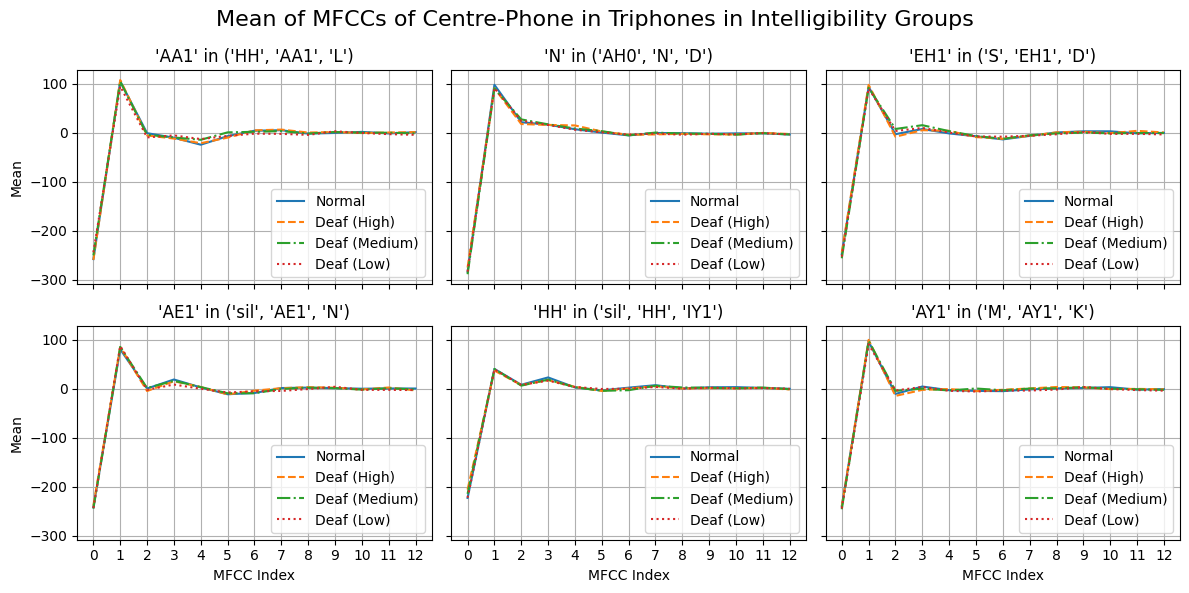

In [ ]:
triphone_list = [('HH', 'AA1', 'L'), ('AH0', 'N', 'D'), ('S', 'EH1', 'D'), (' ', 'AE1', 'N'), (' ', 'HH', 'IY1'), ('M', 'AY1', 'K')]

# create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot in each subplot and give each a subtitle
for i, ax in enumerate(axes):
    triphone = triphone_list[i]
    triphone = tuple("sil" if x == " " else x for x in triphone)
    triphone_name = '_'.join(triphone)+'_frame'
    
    save_path_1 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
    triphone_stats_1 = np.load(save_path_1)
    save_path_2 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}_intelli.npz')
    triphone_stats_2 = np.load(save_path_2)
    styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    markers = ['o', 's', '^', 'd', '*']

    ax.plot(range(0,13), triphone_stats_1['NH_mean'], label="Normal", linestyle=styles[0])
    # ax.plot(range(0,13), triphone_stats_1['HI_mean'], label="Deaf (All)", linestyle=styles[1])
    ax.plot(range(0,13), triphone_stats_2['HI_mean_h'], label="Deaf (High)", linestyle=styles[1])
    ax.plot(range(0,13), triphone_stats_2['HI_mean_m'], label="Deaf (Medium)", linestyle=styles[2])
    ax.plot(range(0,13), triphone_stats_2['HI_mean_l'], label="Deaf (Low)", linestyle=styles[3])

    ax.set_xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
    ax.legend()
    ax.set(xlabel='MFCC Index', ylabel='Mean')
    
    # subtitle for each subplot
    ax.set_title(f"\'{triphone[1]}\' in {triphone}")
    ax.grid(True)

for ax in axes:
    ax.label_outer()
fig.suptitle("Mean of MFCCs of Centre-Phone in Triphones in Intelligibility Groups", fontsize=16)    # TODO

# adjust layout to prevent overlap
plt.tight_layout()

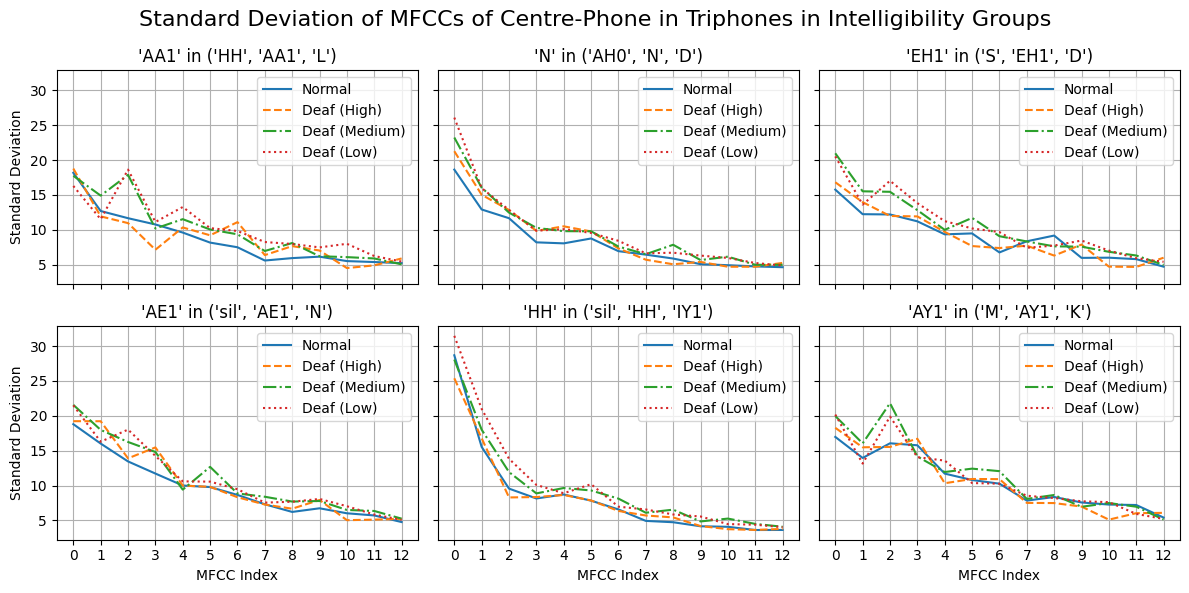

In [ ]:
triphone_list = [('HH', 'AA1', 'L'), ('AH0', 'N', 'D'), ('S', 'EH1', 'D'), (' ', 'AE1', 'N'), (' ', 'HH', 'IY1'), ('M', 'AY1', 'K')]

# create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot in each subplot and give each a subtitle
for i, ax in enumerate(axes):
    triphone = triphone_list[i]
    triphone = tuple("sil" if x == " " else x for x in triphone)
    triphone_name = '_'.join(triphone)+'_frame'
    
    save_path_1 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}.npz')
    triphone_stats_1 = np.load(save_path_1)
    save_path_2 = os.path.join(DATA_PATH, 'triphone_results', f'{triphone_name}_intelli.npz')
    triphone_stats_2 = np.load(save_path_2)
    styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    markers = ['o', 's', '^', 'd', '*']

    ax.plot(range(0,13), triphone_stats_1['NH_std'], label="Normal", linestyle=styles[0])
    # ax.plot(range(0,13), triphone_stats_1['HI_std'], label="Deaf (All)", linestyle=styles[1])
    ax.plot(range(0,13), triphone_stats_2['HI_std_h'], label="Deaf (High)", linestyle=styles[1])
    ax.plot(range(0,13), triphone_stats_2['HI_std_m'], label="Deaf (Medium)", linestyle=styles[2])
    ax.plot(range(0,13), triphone_stats_2['HI_std_l'], label="Deaf (Low)", linestyle=styles[3])

    ax.set_xticks(range(0, 13), [f'{i}' for i in range(0, 13)])
    ax.legend()
    ax.set(xlabel='MFCC Index', ylabel='Standard Deviation')
    
    # subtitle for each subplot
    ax.set_title(f"\'{triphone[1]}\' in {triphone}")
    ax.grid(True)

for ax in axes:
    ax.label_outer()
fig.suptitle("Standard Deviation of MFCCs of Centre-Phone in Triphones in Intelligibility Groups", fontsize=16)    # TODO

# adjust layout to prevent overlap
plt.tight_layout()

Helper:

In [ ]:
# ARPAbet to IPA mapping dictionary
ARPABET_TO_IPA = {
    'AA': 'ɑ', 'AE': 'æ', 'AH': 'ʌ', 'AO': 'ɔ', 'AW': 'aʊ', 'AY': 'aɪ',
    'B': 'b', 'CH': 'tʃ', 'D': 'd', 'DH': 'ð', 'EH': 'ɛ', 'ER': 'ɝ',
    'EY': 'eɪ', 'F': 'f', 'G': 'ɡ', 'HH': 'h', 'IH': 'ɪ', 'IY': 'i',
    'JH': 'dʒ', 'K': 'k', 'L': 'l', 'M': 'm', 'N': 'n', 'NG': 'ŋ',
    'OW': 'oʊ', 'OY': 'ɔɪ', 'P': 'p', 'R': 'ɹ', 'S': 's', 'SH': 'ʃ',
    'T': 't', 'TH': 'θ', 'UH': 'ʊ', 'UW': 'u', 'V': 'v', 'W': 'w',
    'Y': 'j', 'Z': 'z', 'ZH': 'ʒ'
}

def arpabet_to_ipa(arpabet_list):
    """
    Convert a list of ARPAbet phonemes to an IPA string.
    Strips stress markers (0, 1, 2) if present.
    """
    ipa_output = []
    for phoneme in arpabet_list:
        base_phoneme = ''.join([c for c in phoneme if not c.isdigit()])  # remove stress numbers
        ipa = ARPABET_TO_IPA.get(base_phoneme)
        if ipa:
            ipa_output.append(ipa)
        else:
            ipa_output.append(f"[{phoneme}]")  # keep unknown phonemes marked
    return f'/{ipa_output[0]}-{ipa_output[1]}+{ipa_output[2]}/'

# example usage:
arpabet_example =('W', 'AH0', 'Z') # ('HH', 'AA1', 'L') # ('AH0', 'N', 'D')
ipa_result = arpabet_to_ipa(arpabet_example)
print("IPA:", ipa_result)

IPA: /w-ʌ+z/
